# Perturbation Analysis in Brightway2

**Sarah Schmidt & David Laner**  
Center for Resource Management and Solid Waste Engineering  
University of Kassel - Faculty for Civil and Environmental Engineering  

*September 2022*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Setup" data-toc-modified-id="1.-Setup-1">1. Setup</a></span></li><li><span><a href="#2.-Case-study" data-toc-modified-id="2.-Case-study-2">2. Case study</a></span><ul class="toc-item"><li><span><a href="#2.1-LCA" data-toc-modified-id="2.1-LCA-2.1">2.1 LCA</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Functional-Unit" data-toc-modified-id="2.1.1-Functional-Unit-2.1.1">2.1.1 Functional Unit</a></span></li><li><span><a href="#2.1.2-LCIA-Methods" data-toc-modified-id="2.1.2-LCIA-Methods-2.1.2">2.1.2 LCIA Methods</a></span></li><li><span><a href="#2.1.3-Calculation" data-toc-modified-id="2.1.3-Calculation-2.1.3">2.1.3 Calculation</a></span></li></ul></li></ul></li><li><span><a href="#3.-Perturbation-Analysis" data-toc-modified-id="3.-Perturbation-Analysis-3">3. Perturbation Analysis</a></span><ul class="toc-item"><li><span><a href="#3.1-Select-parameters-to-be-considered-in-the-perturbation-analysis" data-toc-modified-id="3.1-Select-parameters-to-be-considered-in-the-perturbation-analysis-3.1">3.1 Select parameters to be considered in the perturbation analysis</a></span></li><li><span><a href="#3.2-Prepare-Input-Data" data-toc-modified-id="3.2-Prepare-Input-Data-3.2">3.2 Prepare Input Data</a></span></li><li><span><a href="#3.3-Perform-Perturbation-Analysis" data-toc-modified-id="3.3-Perform-Perturbation-Analysis-3.3">3.3 Perform Perturbation Analysis</a></span></li><li><span><a href="#3.4-Calculate-Sensitivity-Indicators" data-toc-modified-id="3.4-Calculate-Sensitivity-Indicators-3.4">3.4 Calculate Sensitivity Indicators</a></span></li><li><span><a href="#3.5-Illustrate-Results" data-toc-modified-id="3.5-Illustrate-Results-3.5">3.5 Illustrate Results</a></span></li></ul></li><li><span><a href="#4.-Extended-Case-Study" data-toc-modified-id="4.-Extended-Case-Study-4">4. Extended Case Study</a></span><ul class="toc-item"><li><span><a href="#4.1-Select-parameters-to-be-considered-in-the-perturbation-analysis" data-toc-modified-id="4.1-Select-parameters-to-be-considered-in-the-perturbation-analysis-4.1">4.1 Select parameters to be considered in the perturbation analysis</a></span></li><li><span><a href="#4.2-Prepare-Input-Data" data-toc-modified-id="4.2-Prepare-Input-Data-4.2">4.2 Prepare Input Data</a></span><ul class="toc-item"><li><span><a href="#4.2.1-Check-for-duplicates" data-toc-modified-id="4.2.1-Check-for-duplicates-4.2.1">4.2.1 Check for duplicates</a></span></li><li><span><a href="#4.2.2-Check-for-loops" data-toc-modified-id="4.2.2-Check-for-loops-4.2.2">4.2.2 Check for loops</a></span></li><li><span><a href="#4.2.3-Check-for-zeros" data-toc-modified-id="4.2.3-Check-for-zeros-4.2.3">4.2.3 Check for zeros</a></span></li><li><span><a href="#4.2.4-Prepare-DataFrame" data-toc-modified-id="4.2.4-Prepare-DataFrame-4.2.4">4.2.4 Prepare DataFrame</a></span></li></ul></li><li><span><a href="#4.3-Perform-Perturbation-Analysis" data-toc-modified-id="4.3-Perform-Perturbation-Analysis-4.3">4.3 Perform Perturbation Analysis</a></span></li><li><span><a href="#4.4-Calculate-Sensitivity-Indicators" data-toc-modified-id="4.4-Calculate-Sensitivity-Indicators-4.4">4.4 Calculate Sensitivity Indicators</a></span></li><li><span><a href="#4.5-Illustrate-Results" data-toc-modified-id="4.5-Illustrate-Results-4.5">4.5 Illustrate Results</a></span></li></ul></li></ul></div>

## 1. Setup

In [1]:
import pandas as pd
import brightway2 as bw
from brightway2 import *
import perturbation_analysis as pa

In [2]:
projects.set_current("Perturbation_Analysis_2209") #a new project will be created if it does not exist already

In [3]:
pd.set_option('display.max_rows', 10)

**Import LCIA methods and elementary flows**

In [4]:
bw.bw2setup() #creates the database "biosphere 3"

Biosphere database already present!!! No setup is needed


In [5]:
biosphere=bw.Database('biosphere3')

**Import of ecoinvent**

In [6]:
if 'ecoinvent 3.7.1_cutoff_ecoSpold02' in bw.databases:
    print("Database has already been imported.")
    ei371 = bw.Database('ecoinvent 3.7.1_cutoff_ecoSpold02')
else:
    # mind that the ecoinvent file must be unzipped; then: path to the datasets subfolder
    fpei371cut = r"C:\Users\SarahSchmidt\Desktop\Databases\ecoinvent\ecoinvent 3.7.1_cutoff_ecoSpold02\datasets"
    # the "r" makes sure that the path is read as a string - especially useful when you have spaces in your string
    ei371cut = bw.SingleOutputEcospold2Importer(fpei371cut, 'ecoinvent 3.7.1_cutoff_ecoSpold02')
    ei371cut
    ei371cut.apply_strategies()
    ei371cut.statistics()
    ei371=ei371cut.write_database()

Database has already been imported.


## 2. Case study

An activity is created and exchanges are added to this activity.

In [7]:
try:
    baking_banana_bread = [act for act in ei371 if 'bakingbananabread' == act['code']][0]
    print("Activity is already existing.")
except IndexError:
    baking_banana_bread = ei371.new_activity(code = 'bakingbananabread', name = "baking banana bread", unit = "unit", loc="DE")
    baking_banana_bread.save()

Activity is already existing.


In [8]:
baking_banana_bread.exchanges().delete()

baking_banana_bread.new_exchange(input=baking_banana_bread.key,amount=1,unit="unit",type='production').save() 
baking_banana_bread.save()

#ingredients imported from Sri Lanka
bananas = [act for act in ei371 if act['name']=='banana production' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=bananas.key,amount=0.4,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

coconut_oil = [act for act in ei371 if act['name']=='coconut oil production, crude' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=coconut_oil.key,amount=0.9*0.075,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

transport_LKA_GE = [act for act in ei371 if act['name']=='transport, freight, sea, container ship' and 'GLO' in act['location']][0]
baking_banana_bread.new_exchange(input=transport_LKA_GE.key,amount=0.001*(0.4+0.075*0.9)*8000,unit="ton kilometer",type='technosphere').save()
baking_banana_bread.save()


#ingredients imported from California
almonds = [act for act in ei371 if act['name']=='almond production' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=almonds.key,amount=0.05,unit="kilogram",type='technosphere').save()
baking_banana_bread.save()

transport_CA_GE = [act for act in ei371 if act['name']=='transport, freight, aircraft, belly-freight, long haul' and 'GLO' in act['location']][0]
baking_banana_bread.new_exchange(input=transport_CA_GE.key,amount=0.001*0.05*9000,unit="ton kilometer",type='technosphere').save()
baking_banana_bread.save()


# ingredients from Germany
flour = [act for act in ei371 if act['name']=='market for wheat flour' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=flour.key,amount=0.245,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

sugar = [act for act in ei371 if act['name']=='sugar beet production' and 'DE' in act['location']][0]
baking_banana_bread.new_exchange(input=sugar.key,amount=0.075,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

milk = [act for act in ei371 if act['name']=='milk production, from cow' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=milk.key,amount=0.06,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

baking_powder = [act for act in ei371 if act['name']=='ammonium carbonate production' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=baking_powder.key,amount=0.005,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

salt = [act for act in ei371 if act['name']=='salt production from seawater, evaporation pond' and 'GLO' in act['location']][0]
baking_banana_bread.new_exchange(input=salt.key,amount=0.003,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

transport_GE = [act for act in ei371 if act['name']=='market for transport, freight, lorry 16-32 metric ton, EURO5' and 'RER' in act['location']][0]
baking_banana_bread.new_exchange(input=transport_GE.key,amount=0.001*(0.245+0.075+0.06+0.005+0.003)*50,unit="ton kilometer",type='technosphere').save() 
baking_banana_bread.save()


#electricity for baking
electricity = [act for act in ei371 if act['name']=='market for electricity, medium voltage' and 'DE' in act['location']][0]
baking_banana_bread.new_exchange(input=electricity.key,amount=1,unit="kilowatt hour",type='technosphere').save()
baking_banana_bread.save()

### 2.1 LCA

#### 2.1.1 Functional Unit

In [9]:
functional_unit = {baking_banana_bread:1}
functional_unit

{'baking banana bread' (unit, GLO, None): 1}

#### 2.1.2 LCIA Methods

In [10]:
import LCIA_methods_JRC

In [11]:
LCIA_methods=LCIA_methods_JRC.LCIA_methods #list containing 16 LCIA methods recommended by JRC
#LCIA_methods

In [12]:
LCIA_method_names=LCIA_methods_JRC.LCIA_method_names # short names of the impact categories assessed 
                                                        # by each of the methods

In [13]:
units =[bw.methods.get(method)['unit'] for method in LCIA_methods]

#### 2.1.3 Calculation

In [14]:
bw.calculation_setups['multiLCA'] = {'inv': [functional_unit], 'ia': LCIA_methods}

In [15]:
baking_banana_bread_MultiLCA = bw.MultiLCA('multiLCA')

In [16]:
df_impact = pd.DataFrame(data = baking_banana_bread_MultiLCA.results.transpose(), index = LCIA_method_names,
                        columns=['baking banana bread'])
df_impact['unit']=units
df_impact

,baking banana bread,unit
GW,1.951724e+00,kg CO2-Eq
OD,1.141967e-07,kg CFC-11.
HTc,5.377118e-08,CTUh
HTnc,4.181930e-06,CTUh
PM,1.166042e-07,disease i.
...,...,...
ET,1.213538e+01,CTU
LU,5.495187e+02,points
RDw,1.580517e+01,m3 water-.
RDm,9.375785e-06,kg Sb-Eq


## 3. Perturbation Analysis

### 3.1 Select parameters to be considered in the perturbation analysis

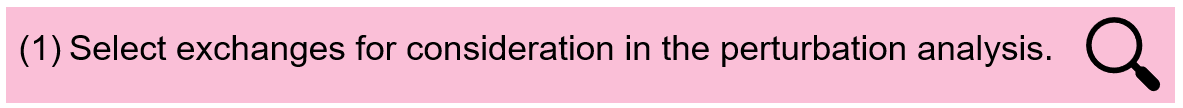

The function *"select_parameters_by_activity_list"* takes a list with activities as an input and returns a list with all input exchanges of the named activities. This function might be applied if for example all exchanges in the foreground system shall be considered in the perturbation analysis.

* **arguments:**  
   * activity_list: list of activities to be considered
   * exc_type: "technosphere", "biosphere" or "all" (default: all)
       
* **returns:** list of all exchanges of the activities included in the activity list matching the given exchange type

In [17]:
param_list=pa.select_parameters_by_activity_list([baking_banana_bread])
param_list

[Exchange: 0.4 kilogram 'banana production' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.0675 kilogram 'coconut oil production, crude' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 3.74 ton kilometer 'transport, freight, sea, container ship' (ton kilometer, GLO, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.05 kilogram 'almond production' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.45 ton kilometer 'transport, freight, aircraft, belly-freight, long haul' (ton kilometer, GLO, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.245 kilogram 'market for wheat flour' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.075 kilogram 'sugar beet production' (kilogram, DE, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.06 kilogram 'milk production, from cow' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, No

### 3.2 Prepare Input Data

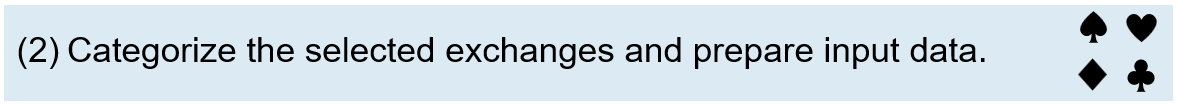

*parameters_to_dataframe* creates a DataFrame that will be used as an input for performing the perturbation analysis. The exchanges considered in the DataFrame can be categorized by key words in activity names or exchange input names, by exchange types or by exchange input locations.

* **arguments:**  
   * parameter_list: list of exchanges to be considered
   * category_type: None, "activity", "input", "location" or "type" (default: None)
   * category_dict: A dictionary assigning categories (values) to key words (keys). Needs to be defined in case *category_type* is "activity", "input" or "location". (default: None)
       
* **returns:** list of all exchanges of the activities included in the activity list matching the given exchange type

In [33]:
perturb_input=pa.parameters_to_dataframe(param_list,category_type='input',
                                    category_dict={'banana':'ingredients',
                                                   'coconut':'ingredients',
                                                   'almond':'ingredients',
                                                   'milk':'ingredients',
                                                   'flour':'ingredients',
                                                   'sugar':'ingredients',
                                                   'carbonate':'ingredients',
                                                   'salt':'ingredients',
                                                   'transport':'transport',
                                                   'electricity':'energy'})
perturb_input

,from,from - code,from - location,to,to - code,type,category,default amount,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,run10,run11
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,0.4000,0.4040,0.400000,0.4000,0.4000,0.4000,0.4000,0.4000,0.4000,0.40000,0.40000,0.400000,0.4000
1,"coconut oil production, crude",e7e518b52017a50bbbbac1098c11f5f5,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,0.0675,0.0675,0.068175,0.0675,0.0675,0.0675,0.0675,0.0675,0.0675,0.06750,0.06750,0.067500,0.0675
2,"transport, freight, sea, container ship",b7f36fd38fb9f8ab7ec687bd658b36aa,GLO,baking banana bread,bakingbananabread,technosphere,transport,3.7400,3.7400,3.740000,3.7774,3.7400,3.7400,3.7400,3.7400,3.7400,3.74000,3.74000,3.740000,3.7400
3,almond production,a9b66be975b737b12705f3366d31bd1e,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,0.0500,0.0500,0.050000,0.0500,0.0505,0.0500,0.0500,0.0500,0.0500,0.05000,0.05000,0.050000,0.0500
4,"transport, freight, aircraft, belly-freight, l...",034bbdcaaf672de1e7a1fe4c26372892,GLO,baking banana bread,bakingbananabread,technosphere,transport,0.4500,0.4500,0.450000,0.4500,0.4500,0.4545,0.4500,0.4500,0.4500,0.45000,0.45000,0.450000,0.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,0.0600,0.0600,0.060000,0.0600,0.0600,0.0600,0.0600,0.0600,0.0606,0.06000,0.06000,0.060000,0.0600
8,ammonium carbonate production,6b71ff189f73e7c5db8f43df84354641,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,0.0050,0.0050,0.005000,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.00505,0.00500,0.005000,0.0050
9,"salt production from seawater, evaporation pond",845aac68817ec25b85464aef8b7b86ac,GLO,baking banana bread,bakingbananabread,technosphere,ingredients,0.0030,0.0030,0.003000,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.00300,0.00303,0.003000,0.0030
10,"market for transport, freight, lorry 16-32 met...",8ceab4319b3eb21ad7adb89accd4465b,RER,baking banana bread,bakingbananabread,technosphere,transport,0.0194,0.0194,0.019400,0.0194,0.0194,0.0194,0.0194,0.0194,0.0194,0.01940,0.01940,0.019594,0.0194


In [34]:
perturb_input['category'].value_counts()

ingredients    8
transport      3
energy         1
Name: category, dtype: int64

### 3.3 Perform Perturbation Analysis

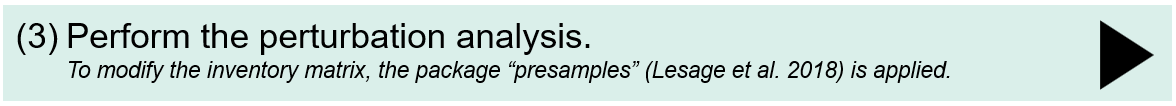

* **arguments:**  
   * functional unit: {activity : amount}
   * LCIA methods: list containing at least one bw.methods-item
   * perturb_input: dataframe containing input data for the perturbation analysis (output of the function *parameters_to_dataframe*)
   * database_name: name of the database used
       
* **returns:** 
    * results of the reproduced LCA calculations for an incremental increase of each parameter individually (columns: methods, indices: runs of the LCA calculation ("default" refers to the default LCA results, "run-i" refers to the reproduced calculation for an incremental increase of parameter i --> cf. index in *perturb_input*)

The caluclation is performed using *presamples*. (cf. https://presamples.readthedocs.io/en/latest/use_with_bw2.html, Lesage et al. 2018: https://doi.org/10.1007/s11367-018-1444-x)

In [35]:
results=pa.perform_perturbation_analysis(functional_unit,LCIA_methods,perturb_input,'ecoinvent 3.7.1_cutoff_ecoSpold02')
results

--- 9.47 seconds ---


,"('ILCD 2.0 2018 midpoint no LT', 'climate change', 'climate change total')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'ozone layer depletion')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'carcinogenic effects')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'non-carcinogenic effects')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'respiratory effects, inorganics')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'ionising radiation')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'photochemical ozone creation')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater and terrestrial acidification')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'terrestrial eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'marine eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater ecotoxicity')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'land use')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'dissipated water')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'minerals and metals')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'fossils')"
default,1.951724,1.141967e-07,5.377118e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.135384,549.518718,15.805165,0.000009,19.263551
run0,1.952307,1.142225e-07,5.379344e-08,0.000004,1.166642e-07,0.056168,0.005866,0.018377,0.072833,0.000309,0.009869,12.135802,549.668163,15.833363,0.000009,19.267552
run1,1.953513,1.142874e-07,5.387623e-08,0.000004,1.168105e-07,0.056191,0.005873,0.018391,0.072891,0.000310,0.009886,12.185409,549.998627,15.819340,0.000009,19.275622
run2,1.952075,1.142674e-07,5.378160e-08,0.000004,1.166147e-07,0.056176,0.005873,0.018380,0.072828,0.000309,0.009863,12.135554,549.519061,15.805178,0.000009,19.268021
run3,1.952540,1.142518e-07,5.379704e-08,0.000004,1.166906e-07,0.056175,0.005868,0.018382,0.072853,0.000309,0.009866,12.187272,549.737129,15.853185,0.000009,19.271286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run7,1.957587,1.143495e-07,5.390031e-08,0.000004,1.170427e-07,0.056225,0.005875,0.018429,0.073053,0.000310,0.009885,12.146921,553.089547,15.811071,0.000009,19.286283
run8,1.951835,1.142006e-07,5.377315e-08,0.000004,1.166087e-07,0.056158,0.005865,0.018369,0.072798,0.000309,0.009860,12.135436,549.519175,15.805240,0.000009,19.264913
run9,1.951724,1.141967e-07,5.377118e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.135384,549.518718,15.840728,0.000009,19.263552
run10,1.951756,1.142040e-07,5.377181e-08,0.000004,1.166064e-07,0.056158,0.005865,0.018368,0.072797,0.000309,0.009860,12.135469,549.519209,15.805167,0.000009,19.264040


### 3.4 Calculate Sensitivity Indicators

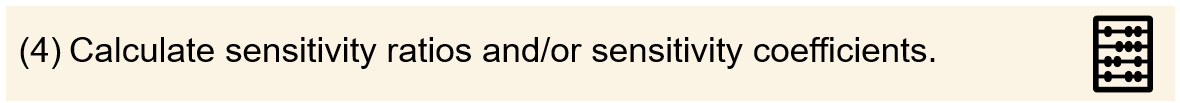

The results of the perturbation analysis are evaluated by means of the sensitivity coefficient SC (cf. Equation 1) and sensitivity ratio (cf. Equation 2) which are calculated as the ratio between (relative) changes of LCA results and (relative) changes of parameter values compared to the initial system (Clavreul et al. 2012, Bisinella et al. 2016). For example, a sensitivity ratio of 0.5 implies that an increase of the parameter value by 10% results in an increase of LCA scores by 5%.

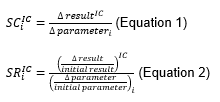

* **arguments:**  
   * LCIA methods: list containing at least on bw.methods-item
   * perturb_input: dataframe containing input data for the perturbation analysis (output of the function *parameters_to_dataframe*)
   * perturb_results: output of *perform_perturbation_analysis*
       
* **returns:** 
    * DataFrame containing sensitivity ratios per parameter and impact category

In [36]:
sensitivity_ratio_df=pa.calculate_sensitivity_ratios(LCIA_methods,perturb_results=results, perturb_input=perturb_input)
sensitivity_ratio_df

,from,from - code,from - location,to,to - code,type,category,"('ILCD 2.0 2018 midpoint no LT', 'climate change', 'climate change total')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'ozone layer depletion')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'carcinogenic effects')",...,"('ILCD 2.0 2018 midpoint no LT', 'human health', 'photochemical ozone creation')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater and terrestrial acidification')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'terrestrial eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'marine eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater ecotoxicity')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'land use')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'dissipated water')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'minerals and metals')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'fossils')"
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,2.984533e-02,2.259082e-02,0.041403,...,2.706575e-02,4.589531e-02,4.885008e-02,3.617287e-02,8.916888e-02,3.444380e-03,2.719549e-02,0.178407,0.051294,0.020769
1,"coconut oil production, crude",e7e518b52017a50bbbbac1098c11f5f5,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,9.167795e-02,7.942895e-02,0.195368,...,1.405806e-01,1.241247e-01,1.293329e-01,7.173957e-02,2.650026e-01,4.122262e-01,8.733256e-02,0.089686,0.186455,0.062660
2,"transport, freight, sea, container ship",b7f36fd38fb9f8ab7ec687bd658b36aa,GLO,baking banana bread,bakingbananabread,technosphere,transport,1.796610e-02,6.187630e-02,0.019390,...,1.379483e-01,6.223921e-02,4.295322e-02,4.074090e-04,2.853735e-02,1.403524e-03,6.236591e-05,0.000081,0.004788,0.023201
3,almond production,a9b66be975b737b12705f3366d31bd1e,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,4.179415e-02,4.824466e-02,0.048100,...,6.191054e-02,7.418282e-02,7.621443e-02,2.471367e-02,5.993813e-02,4.275761e-01,3.974587e-02,0.303822,0.127361,0.040152
4,"transport, freight, aircraft, belly-freight, l...",034bbdcaaf672de1e7a1fe4c26372892,GLO,baking banana bread,bakingbananabread,technosphere,transport,9.526501e-02,3.693611e-01,0.010674,...,1.773095e-01,5.420808e-02,5.561715e-02,9.059324e-04,3.748677e-02,3.476789e-03,2.099211e-04,0.000232,0.004290,0.133723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,3.003952e-01,1.338037e-01,0.240155,...,1.673730e-01,3.312978e-01,3.514685e-01,1.876280e-01,2.548325e-01,9.507444e-02,6.498101e-01,0.037369,0.275071,0.118005
8,ammonium carbonate production,6b71ff189f73e7c5db8f43df84354641,RoW,baking banana bread,bakingbananabread,technosphere,ingredients,5.682070e-03,3.380427e-03,0.003674,...,3.684341e-03,2.564871e-03,1.616045e-03,9.826037e-04,4.422378e-03,4.279242e-04,8.302165e-05,0.000474,0.013365,0.007069
9,"salt production from seawater, evaporation pond",845aac68817ec25b85464aef8b7b86ac,GLO,baking banana bread,bakingbananabread,technosphere,ingredients,8.287994e-07,6.781031e-07,0.000009,...,8.778685e-07,3.982120e-07,2.092164e-07,2.738045e-07,1.440581e-07,4.484516e-07,1.282116e-08,0.225006,0.000002,0.000001
10,"market for transport, freight, lorry 16-32 met...",8ceab4319b3eb21ad7adb89accd4465b,RER,baking banana bread,bakingbananabread,technosphere,transport,1.650687e-03,6.402034e-03,0.001178,...,2.244177e-03,7.015637e-04,5.916251e-04,7.668095e-05,3.966379e-04,7.042002e-04,8.922494e-05,0.000014,0.001202,0.002536


### 3.5 Illustrate Results

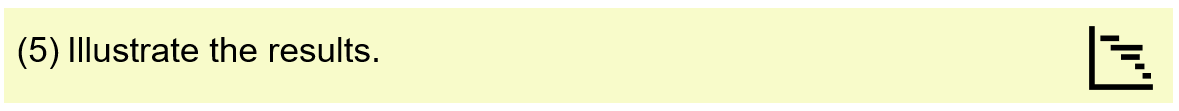

If the sensitivity of LCA scores is assessed only for a small numbers of parameters, the results can be illustrated one by one:

In [37]:
pa.plot_sensitivity_ratios_plotly(sensitivity_ratio_df, LCIA_method_names)

## 4. Extended Case Study

### 4.1 Select parameters to be considered in the perturbation analysis

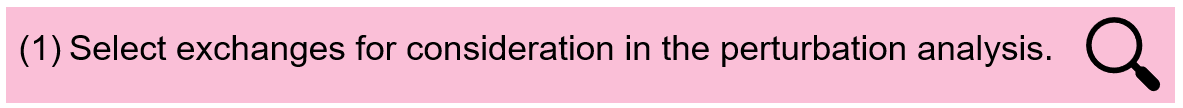

The function *select_parameters_by_supply_chain_level* is applied in case exchanges that are part of a defined level of the supply chain shall be considered in the perturbation analysis. 

* **arguments:**  
   * activity_list: activity
   * max_level: maximum level of supply chain to be considered
       
* **returns:** list of all exchanges of the activities that are part of the selected section of the supply chain

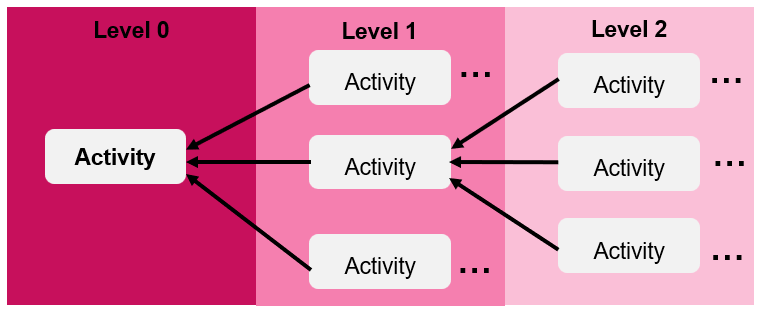

In [38]:
param_list_2=pa.select_parameters_by_supply_chain_level(baking_banana_bread,max_level=1)
len(param_list_2)

12

In [39]:
param_list_2=pa.select_parameters_by_supply_chain_level(baking_banana_bread,max_level=2)
len(param_list_2)

823

### 4.2 Prepare Input Data

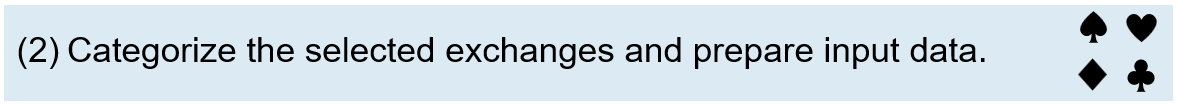

#### 4.2.1 Check for duplicates

The parameter list must not contain duplicates in terms of exchanges with identical input and output activies that can only be distinguished by the amount. Duplicates have to be removed from the list. This can either be done by condensing these exchanges or by excluding them from the perturbation analysis. 

In [40]:
pa.check_for_duplicates(param_list_2) #prints duplicates if existing

#### 4.2.2 Check for loops

In [41]:
# prints exchanges starting and ending at the same activity
# if remove == True: exchanges starting and ending at the same activity are removed from the parameter list
param_list_2=pa.check_for_loops(param_list_2, remove=True) 

Exchange: 0.00265815405366773 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, DE, None) to 'market for electricity, medium voltage' (kilowatt hour, DE, None)>


#### 4.2.3 Check for zeros

In [42]:
# prints exchanges with default amount = 0
# if remove == True: exchanges with default amount = 0 are removed from the parameter list
param_list_2=pa.check_for_zeros(param_list_2, remove=True) 

#### 4.2.4 Prepare DataFrame

*parameters_to_dataframe* creates a DataFrame that will be used as an input for performing the perturbation analysis. The exchanges considered in the DataFrame can be categorized by key words in activity names or exchange input names, by exchange types or by exchange input locations.

* **arguments:**  
   * parameter_list: list of exchanges to be considered
   * category_type: None, "activity", "input", "location" or "type" (default: None)
   * category_dict: A dictionary assigning categories (values) to key words (keys). Needs to be defined in case *category_type* is "activity", "input" or "location". (default: None)
       
* **returns:** list of all exchanges of the activities included in the activity list matching the given exchange type

In [43]:
perturb_input_2=pa.parameters_to_dataframe(param_list_2,category_type='input',
                                           category_dict={'transport':'transport', 
                                                          'fertiliser':'fertiliser', 
                                                          'electricity':'electricity'})
perturb_input_2

,from,from - code,from - location,to,to - code,type,category,default amount,run0,run1,...,run812,run813,run814,run815,run816,run817,run818,run819,run820,run821
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,others,4.000000e-01,4.040000e-01,4.000000e-01,...,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01
1,"market for poultry manure, dried",4887ac7b45b04f1f2f259bd1adb70f63,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,1.630239e-03,1.630239e-03,1.646542e-03,...,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03
2,"market for diesel, burned in agricultural mach...",227b698bdbe0cfd3f0230d7315df273f,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,2.859762e-02,2.859762e-02,2.859762e-02,...,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02
3,market for potassium sulfate,f84d5bbc788f3f2d8e505a5d77464172,RER,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,1.085049e-03,1.085049e-03,1.085049e-03,...,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03
4,market for application of plant protection pro...,82e699bad21c2bc5ab1b0851349dae35,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,1.202709e-04,1.202709e-04,1.202709e-04,...,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,"market for sulfur hexafluoride, liquid",5f2580f7d4e2d2df13adb9f31b85b354,RER,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,others,1.130000e-07,1.130000e-07,1.130000e-07,...,1.130000e-07,1.130000e-07,1.130000e-07,1.130000e-07,1.130000e-07,1.141300e-07,1.130000e-07,1.130000e-07,1.130000e-07,1.130000e-07
818,"market for transmission network, electricity, ...",6bd8d314105d5011025136b680d07845,GLO,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,1.862777e-08,1.862777e-08,1.862777e-08,...,1.862777e-08,1.862777e-08,1.862777e-08,1.862777e-08,1.862777e-08,1.862777e-08,1.881405e-08,1.862777e-08,1.862777e-08,1.862777e-08
819,electricity voltage transformation from high t...,314b80f8f4f0bb03c1d0aad5cdda8dfa,DE,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,9.739410e-01,9.739410e-01,9.739410e-01,...,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,9.836805e-01,9.739410e-01,9.739410e-01
820,"electricity, from municipal waste incineration...",1d85d27ee225f9448286cff38de7cb1f,DE,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,2.605896e-02,2.605896e-02,2.605896e-02,...,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.631955e-02,2.605896e-02


In [44]:
perturb_input_2['category'].value_counts()

others         460
fertiliser     221
electricity    117
transport       24
Name: category, dtype: int64

### 4.3 Perform Perturbation Analysis

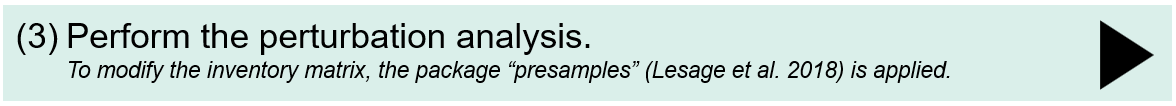

In [45]:
results_2=pa.perform_perturbation_analysis(functional_unit,LCIA_methods,perturb_input_2,'ecoinvent 3.7.1_cutoff_ecoSpold02')
results_2

--- 537.02 seconds ---


,"('ILCD 2.0 2018 midpoint no LT', 'climate change', 'climate change total')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'ozone layer depletion')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'carcinogenic effects')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'non-carcinogenic effects')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'respiratory effects, inorganics')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'ionising radiation')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'photochemical ozone creation')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater and terrestrial acidification')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'terrestrial eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'marine eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater ecotoxicity')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'land use')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'dissipated water')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'minerals and metals')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'fossils')"
default,1.951724,1.141967e-07,5.377117e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.135384,549.518710,15.805165,0.000009,19.263551
run0,1.952307,1.142225e-07,5.379344e-08,0.000004,1.166642e-07,0.056168,0.005866,0.018377,0.072833,0.000309,0.009869,12.135802,549.668154,15.833363,0.000009,19.267552
run1,1.951725,1.141967e-07,5.377119e-08,0.000004,1.166043e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.135384,549.518719,15.805165,0.000009,19.263566
run2,1.951739,1.141991e-07,5.377168e-08,0.000004,1.166047e-07,0.056157,0.005865,0.018368,0.072798,0.000309,0.009860,12.135419,549.519052,15.805167,0.000009,19.263745
run3,1.951728,1.141973e-07,5.377143e-08,0.000004,1.166046e-07,0.056157,0.005865,0.018368,0.072797,0.000309,0.009860,12.135392,549.518800,15.805169,0.000009,19.263628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run817,1.951724,1.141967e-07,5.377118e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.135384,549.518710,15.805165,0.000009,19.263552
run818,1.951730,1.141970e-07,5.377810e-08,0.000004,1.166048e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.135498,549.518917,15.805168,0.000009,19.263626
run819,1.957561,1.143436e-07,5.382889e-08,0.000004,1.166436e-07,0.056398,0.005872,0.018381,0.072826,0.000310,0.009862,12.136671,549.540366,15.806089,0.000009,19.359951
run820,1.951724,1.141967e-07,5.377117e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.135384,549.518710,15.805165,0.000009,19.263551


### 4.4 Calculate Sensitivity Indicators

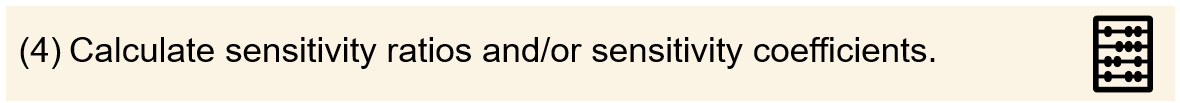

In [46]:
sensitivity_ratio_df_2=pa.calculate_sensitivity_ratios(LCIA_methods,
                                                       perturb_results=results_2, 
                                                       perturb_input=perturb_input_2)
sensitivity_ratio_df_2

,from,from - code,from - location,to,to - code,type,category,"('ILCD 2.0 2018 midpoint no LT', 'climate change', 'climate change total')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'ozone layer depletion')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'carcinogenic effects')",...,"('ILCD 2.0 2018 midpoint no LT', 'human health', 'photochemical ozone creation')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater and terrestrial acidification')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'terrestrial eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'marine eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater ecotoxicity')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'land use')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'dissipated water')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'minerals and metals')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'fossils')"
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,others,0.029845,2.259082e-02,4.140348e-02,...,2.706575e-02,4.589531e-02,4.885007e-02,3.617287e-02,8.916888e-02,3.444380e-03,2.719549e-02,1.784068e-01,0.051294,2.076949e-02
1,"market for poultry manure, dried",4887ac7b45b04f1f2f259bd1adb70f63,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000057,3.772974e-05,2.574635e-05,...,6.849983e-05,4.204109e-05,2.563337e-05,1.540792e-05,8.806324e-06,4.466639e-06,1.700190e-06,1.063061e-06,0.000033,7.461300e-05
2,"market for diesel, burned in agricultural mach...",227b698bdbe0cfd3f0230d7315df273f,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000739,2.074780e-03,9.374307e-04,...,2.355705e-03,6.447973e-04,6.832037e-04,6.897240e-05,4.586970e-04,2.935787e-04,6.230028e-05,9.071524e-06,0.001627,1.004006e-03
3,market for potassium sulfate,f84d5bbc788f3f2d8e505a5d77464172,RER,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000223,4.937893e-04,4.828374e-04,...,3.352078e-04,2.930875e-04,8.894325e-05,5.272527e-05,5.636327e-05,7.247641e-05,1.650365e-05,2.340147e-05,0.001959,3.956673e-04
4,market for application of plant protection pro...,82e699bad21c2bc5ab1b0851349dae35,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000050,1.390317e-04,7.502423e-05,...,1.687140e-04,4.413883e-05,4.897285e-05,4.758593e-06,3.282194e-05,1.072794e-05,1.416883e-05,6.078752e-07,0.000170,6.512723e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,"market for sulfur hexafluoride, liquid",5f2580f7d4e2d2df13adb9f31b85b354,RER,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,others,0.000008,3.743790e-07,3.305986e-07,...,3.387887e-07,3.659593e-07,8.935539e-08,2.117522e-07,5.776241e-08,4.757311e-08,9.411357e-09,3.333672e-08,0.000001,8.651035e-07
818,"market for transmission network, electricity, ...",6bd8d314105d5011025136b680d07845,GLO,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,0.000313,3.137284e-04,1.288506e-02,...,7.161783e-04,4.527470e-04,2.515045e-04,3.405559e-04,1.336252e-04,9.442512e-04,3.775462e-05,1.993756e-05,0.057342,3.854115e-04
819,electricity voltage transformation from high t...,314b80f8f4f0bb03c1d0aad5cdda8dfa,DE,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,0.299081,1.286175e-01,1.073386e-01,...,1.233717e-01,6.866728e-02,4.022428e-02,2.929166e-01,2.409793e-02,1.060619e-02,3.940943e-03,5.843932e-03,0.061754,5.004228e-01
820,"electricity, from municipal waste incineration...",1d85d27ee225f9448286cff38de7cb1f,DE,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0

### 4.5 Illustrate Results

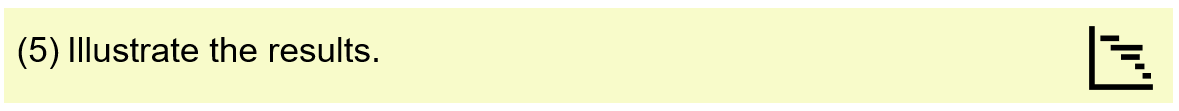

,from,to,category,frequency in top results
1,"milk production, from cow",baking banana bread,others,5
2,almond production,baking banana bread,others,3
3,"wheat grain processing, dry milling",market for wheat flour,others,2
4,"market for electricity, medium voltage",baking banana bread,electricity,2
5,electricity voltage transformation from high t...,"market for electricity, medium voltage",electricity,2
...,...,...,...,...
8,"coconut oil production, crude",baking banana bread,others,1
9,"market for coconut, dehusked","coconut oil production, crude",others,1
10,"transport, freight, aircraft, belly-freight, l...",baking banana bread,transport,1
11,Zinc,almond production,others,1


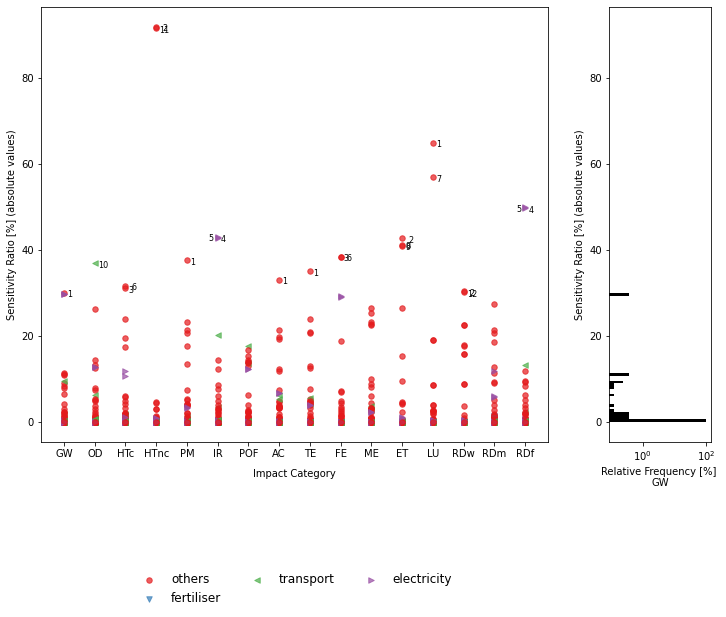

In [47]:
pa.plot_sensitivity_ratios_with_hist_absolute_with_legend(sensitivity_ratio_df_2,
                                                          LCIA_methods,LCIA_method_names=LCIA_method_names,
                                                          hist_IC=0, top=None, SR_min=0.3)

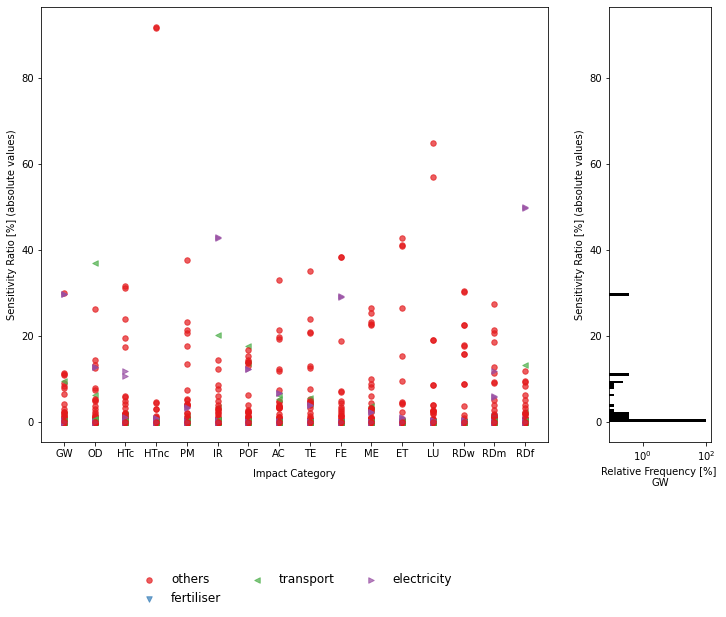

In [48]:
pa.plot_sensitivity_ratios_with_hist_absolute(sensitivity_ratio_df_2,
                                                          LCIA_methods,LCIA_method_names=LCIA_method_names,
                                                          hist_IC=0)

In [49]:
pa.top_sensitivity_ratios(sensitivity_ratio_df_2,top=2)

,from,from - code,from - location,to,to - code,type,category,"('ILCD 2.0 2018 midpoint no LT', 'climate change', 'climate change total')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'ozone layer depletion')","('ILCD 2.0 2018 midpoint no LT', 'human health', 'carcinogenic effects')",...,"('ILCD 2.0 2018 midpoint no LT', 'human health', 'photochemical ozone creation')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater and terrestrial acidification')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'terrestrial eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'marine eutrophication')","('ILCD 2.0 2018 midpoint no LT', 'ecosystem quality', 'freshwater ecotoxicity')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'land use')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'dissipated water')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'minerals and metals')","('ILCD 2.0 2018 midpoint no LT', 'resources', 'fossils')"
512,"wheat grain processing, dry milling",bfe319e9fff71ed8b7a9bf4794036971,RoW,market for wheat flour,72297801f1495a317939b37d37bf8a9e,technosphere,others,0.109278,0.126149,0.311451,...,0.143853,0.193774,0.206172,0.384442,0.226769,0.041691,0.189968,0.158504,0.207372,0.084732
771,Ammonia,0f440cc0-0f74-446d-99d6-8ff0e97a2444,"('air', 'non-urban air or from high stacks')","milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.213472,0.240247,0.000000,0.012115,0.000000,0.000000,0.000000,0.000000,0.000000
774,"Occupation, pasture, man made",59ded913-17fe-4b3e-80cb-79b97cdbef9a,"('natural resource', 'land')","milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.569821,0.000000,0.000000,0.000000
616,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,RoW,baking banana bread,bakingbananabread,technosphere,others,0.300395,0.133804,0.240155,...,0.167373,0.331298,0.351468,0.187628,0.254833,0.095074,0.649810,0.037369,0.275071,0.118005
204,"coconut oil production, crude",e7e518b52017a50bbbbac1098c11f5f5,RoW,baking banana bread,bakingbananabread,technosphere,others,0.091678,0.079429,0.195368,...,0.140581,0.124125,0.129333,0.071740,0.265003,0.412226,0.087333,0.089686,0.186455,0.062660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Zinc,84aa799e-9d98-4d34-85e0-516d28ab1be9,"('soil', 'agricultural')",almond production,a9b66be975b737b12705f3366d31bd1e,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153109,0.000000,0.000000,0.000000,0.000000
442,Water,09872080-d143-4fb1-a3a5-647b077107ff,"('air', 'non-urban air or from high stacks')",almond production,a9b66be975b737b12705f3366d31bd1e,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302071,0.000000,0.000000
509,market for wheat flour,72297801f1495a317939b37d37bf8a9e,RoW,baking banana bread,bakingbananabread,technosphere,others,0.114128,0.143586,0.316771,...,0.154477,0.196829,0.209119,0.384778,0.228743,0.043359,0.190241,0.158552,0.213784,0.092117
478,market for kerosene,1c6db7d522c5e7835f4ea46027672305,RoW,"transport, freight, aircraft, belly-freight, l...",034bbdcaaf672de1e7a1fe4c26372892,technosphere,others,0.009187,0.263037,0.006647,...,0.021395,0.011985,0.004211,0.000506,0.002834,0.001811,0.000126,0.000147,0.002086,0.094646
